# SVD

This notebook illustrates the embedding of a graph through the [generalized singular value decomposition](https://en.wikipedia.org/wiki/Generalized_singular_value_decomposition) of the adjacency matrix. 

In [1]:
%matplotlib inline
import numpy as np

import networkx as nx
import sknetwork as skn

In [2]:
COLORS = ['r', 'b', 'g']

## Undirected graphs

**Loading**

In [3]:
adjacency, labels = skn.data.karate_club(return_labels=True)

**Embedding**

In [9]:
gsvd = skn.embedding.GSVD(3, normalize=False)
embedding = gsvd.fit_transform(adjacency)
embedding.shape

(34, 3)

**Visualization**

In [10]:
graph = nx.from_scipy_sparse_matrix(adjacency)

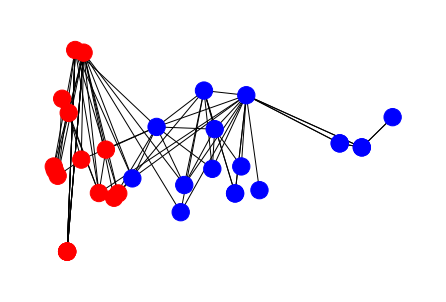

In [11]:
# skip first component of the embedding
nx.draw(graph, pos=embedding[:,1:], node_color=[COLORS[l] for l in labels])

**Predict**

In [ ]:
# to be completed

In [12]:
# find the embedding of a new node
adjacency_vector = np.zeros(adjacency.shape[0], dtype = int)
adjacency_vector[:5] = np.ones(5, dtype = int)

In [14]:
#embedding_vector = gsvd.predict(adjacency_vector)

In [15]:
n = adjacency.shape[0]
new_edges = [(n,i) for i in adjacency_vector if adjacency_vector[i]]

In [16]:
graph.add_edges_from(new_edges)

In [ ]:
#new_embedding = np.vstack((embedding, embedding_vector))

In [ ]:
#new_labels = list(labels) + [2]

In [ ]:
#nx.draw(graph, pos=new_embedding, node_color=[COLORS[l] for l in new_labels])

**Metrics**

In [17]:
skn.embedding.cosine_modularity(adjacency, embedding)

0.04587079856445131

**Parameters**

In [18]:
# embedding dimension
gsvd = skn.embedding.GSVD(n_components=10)
gsvd.fit(adjacency)

GSVD(n_components=10, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, singular_right=0.0, normalize=True, solver=LanczosSVD())

In [20]:
# distribution of singular values over the embedding
gsvd = skn.embedding.GSVD(factor_col = 0)
gsvd.fit(adjacency)

GSVD(n_components=2, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0, singular_right=0.0, normalize=True, solver=LanczosSVD())

In [21]:
# solver
gsvd = skn.embedding.GSVD(solver='halko')
gsvd.fit(adjacency)

GSVD(n_components=2, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, singular_right=0.0, normalize=True, solver=HalkoSVD(n_oversamples=10, n_iter='auto', transpose='auto', power_iteration_normalizer='auto', flip_sign=True))

## Directed graphs

**Loading**

In [22]:
adjacency, names = skn.data.painters(return_labels=True)

**Embedding**

In [27]:
# embedding of the graph considered as bipartite (each node considered twice)
gsvd = skn.embedding.GSVD(3)
gsvd.fit(adjacency)

GSVD(n_components=3, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, singular_right=0.0, normalize=True, solver=LanczosSVD())

In [28]:
embedding = gsvd.embedding_
embedding.shape

(14, 3)

**Visualization**

In [29]:
graph = nx.from_scipy_sparse_matrix(adjacency, create_using=nx.DiGraph())

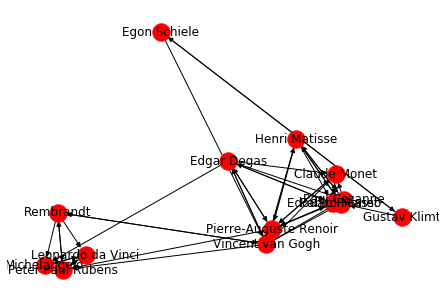

In [30]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos=embedding[:,1:], node_color='r', labels=names)

**Metrics**

In [31]:
skn.embedding.cosine_modularity(adjacency, embedding)

0.08971069826391664

## Bipartite graphs

**Loading**

In [32]:
biadjacency, movies, actors = skn.data.movie_actor(return_labels=True)

**Embedding**

In [34]:
gsvd = skn.embedding.GSVD(3, normalize=False)
gsvd.fit(biadjacency)

GSVD(n_components=3, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, singular_right=0.0, normalize=False, solver=LanczosSVD())

In [35]:
embedding_row = gsvd.embedding_row_
embedding_row.shape

(15, 3)

In [36]:
embedding_col = gsvd.embedding_col_
embedding_col.shape

(16, 3)

**Visualization**



In [37]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [38]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [39]:
n1, n2 = biadjacency.shape
embedding = np.vstack((embedding_row, embedding_col))

In [40]:
colors = n1 * ['r'] + n2 * ['b']

In [41]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

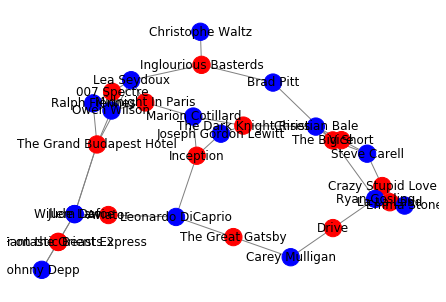

In [42]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, embedding[:,1:], node_color=colors, labels=names, edge_color='grey')